In [1]:
# À installer si ce n'est pas déjà fait :
# pip install pandas numpy matplotlib seaborn scikit-learn imbalanced-learn xgboost

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, RocCurveDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

from imblearn.over_sampling import SMOTE
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


In [28]:
# Chargement
df = pd.read_csv('bank_marketing.csv', sep=';')
df.columns = ['age', 'job', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 'contact', 
              'last_day', 'last_month', 'last_contact_duration', 'campaign', 'pdays', 'previous', 'poutcome', 'Class']
# Aperçu
print(df.shape)
print(pd.concat([df.dtypes, df.isnull().sum()], axis=1, keys=['Type', 'Missing Values']))


(45211, 17)
                         Type  Missing Values
age                     int64               0
job                    object               0
marital                object               0
education              object               0
default                object               0
balance                 int64               0
housing                object               0
loan                   object               0
contact                object               0
last_day                int64               0
last_month             object               0
last_contact_duration   int64               0
campaign                int64               0
pdays                   int64               0
previous                int64               0
poutcome               object               0
Class                   int64               0


In [32]:
display(df.head())
print("stat descriptives")
display(df.describe(include='all'))

,age,job,marital,education,default,balance,housing,loan,contact,last_day,last_month,last_contact_duration,campaign,pdays,previous,poutcome,Class
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,1
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,1
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,1
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,1
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,1


stat descriptives


,age,job,marital,education,default,balance,housing,loan,contact,last_day,last_month,last_contact_duration,campaign,pdays,previous,poutcome,Class
count,45211.000000,45211,45211,45211,45211,45211.000000,45211,45211,45211,45211.000000,45211,45211.000000,45211.000000,45211.000000,45211.000000,45211,45211.000000
unique,NaN,12,3,4,2,NaN,2,2,3,NaN,12,NaN,NaN,NaN,NaN,4,NaN
top,NaN,blue-collar,married,secondary,no,NaN,yes,no,cellular,NaN,may,NaN,NaN,NaN,NaN,unknown,NaN
freq,NaN,9732,27214,23202,44396,NaN,25130,37967,29285,NaN,13766,NaN,NaN,NaN,NaN,36959,NaN
mean,40.936210,NaN,NaN,NaN,NaN,1362.272058,NaN,NaN,NaN,15.806419,NaN,258.163080,2.763841,40.197828,0.580323,NaN,1.116985
std,10.618762,NaN,NaN,NaN,NaN,3044.765829,NaN,NaN,NaN,8.322476,NaN,257.527812,3.098021,100.128746,2.303441,NaN,0.321406
min,18.000000,NaN,NaN,NaN,NaN,-8019.000000,NaN,NaN,NaN,1.000000,NaN,0.000000,1.000000,-1.000000,0.000000,NaN,1.000000
25%,33.000000,NaN,NaN,NaN,NaN,72.000000,NaN,NaN,NaN,8.000000,NaN,103.000000,1.000000,-1.000000,0.000000,NaN,1.000000
50%,39.000000,NaN,NaN,NaN,NaN,448.000000,NaN,NaN,NaN,16.000000,NaN,180.000000,2.000000,-1.000000,0.000000,NaN,1.000000
75%,48.000000,NaN,NaN,NaN,NaN,1428.000000,NaN,NaN,NaN,21.000000,NaN,319.000000,3.000000,-1.000000,0.000000,NaN,1.000000


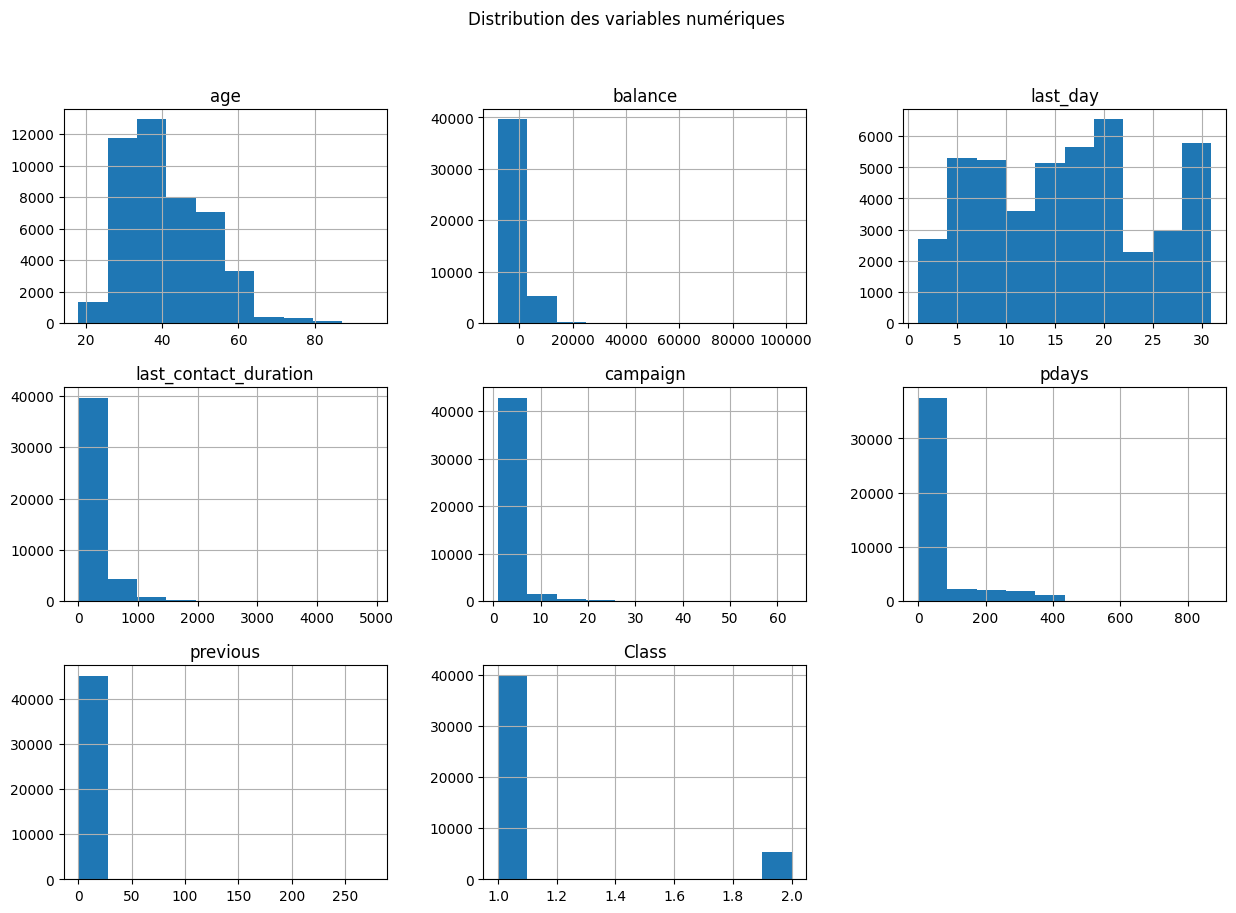

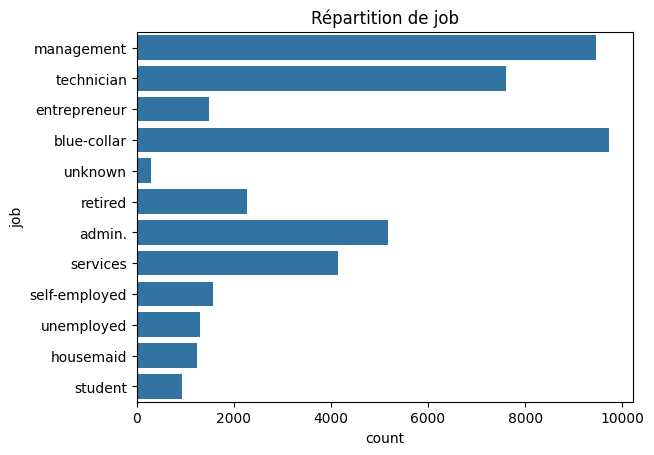

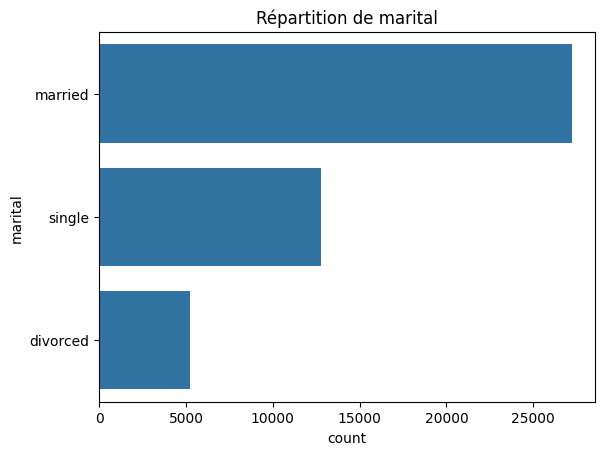

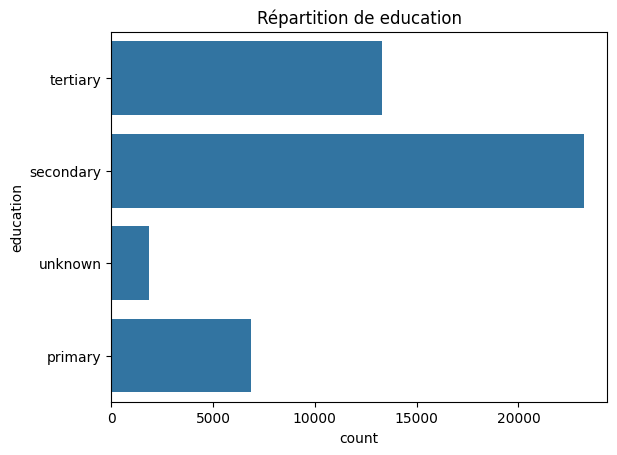

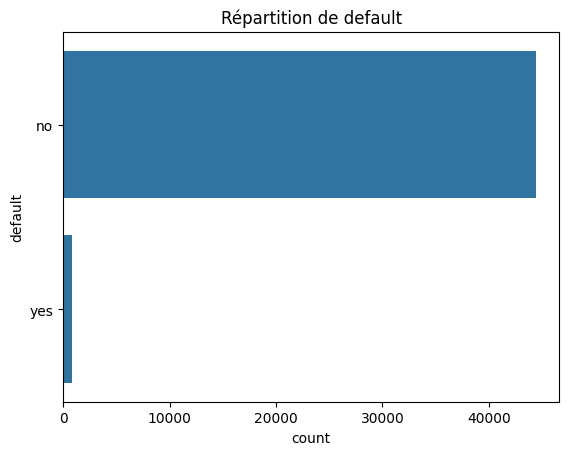

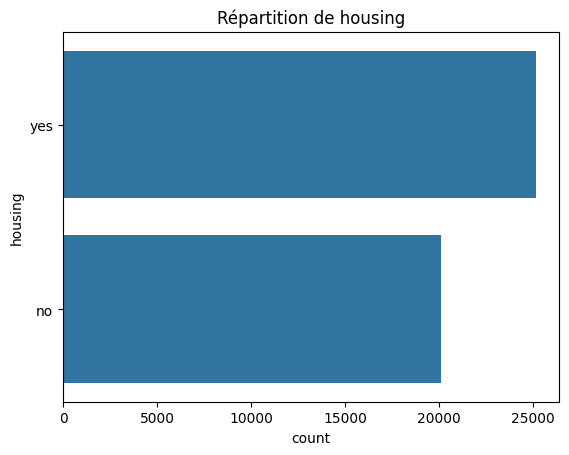

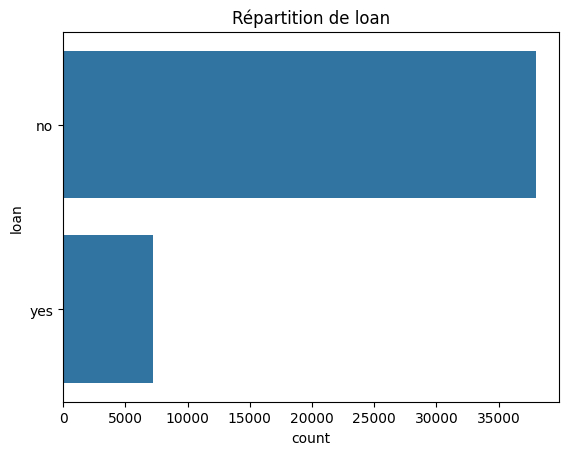

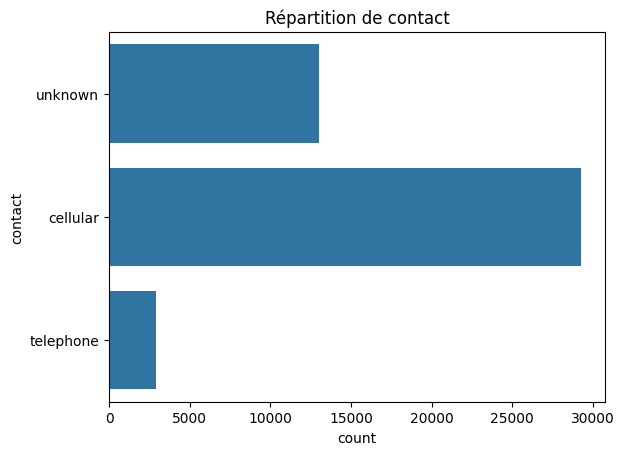

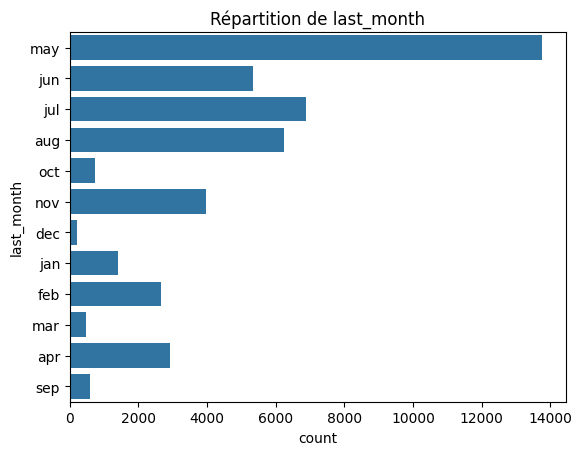

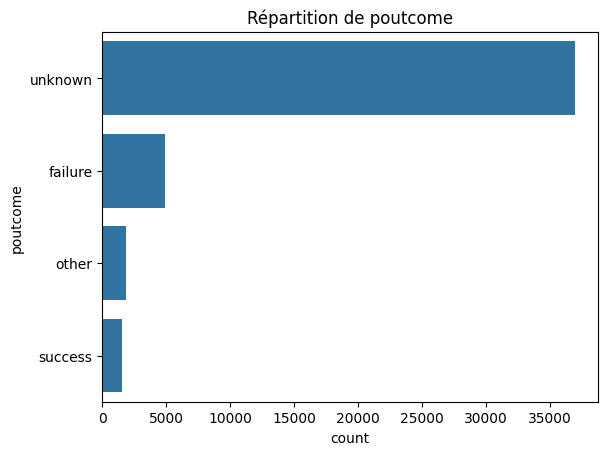

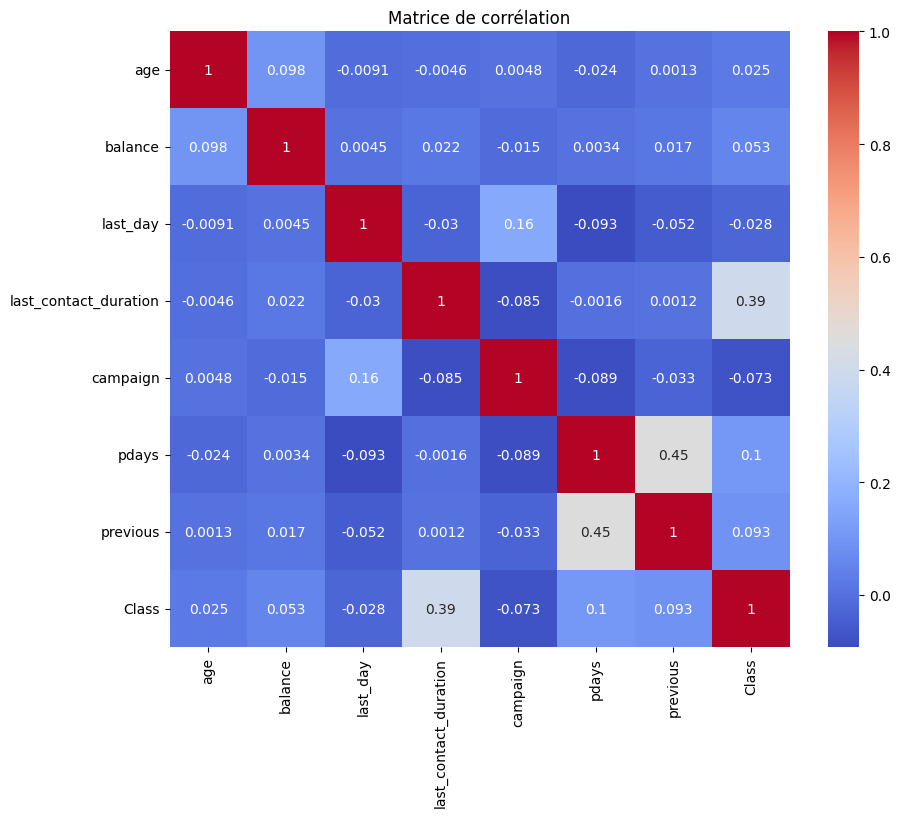

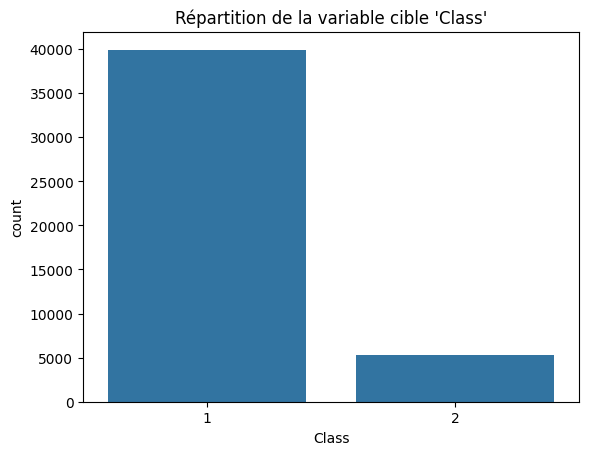

In [ ]:
# Distribution des variables numériques
df.select_dtypes(include=np.number).hist(figsize=(15, 10))
plt.suptitle("Distribution De Variable Numérique Importante")
plt.show()

# Variables catégorielles
for col in df.select_dtypes(include='object').columns:
    sns.countplot(y=col, data=df)
    plt.title(f"Répartition de {col}")
    plt.show()

# Corrélation
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Matrice de corrélation")
plt.show()

# Répartition de la cible
sns.countplot(x='Class', data=df)
plt.title("Répartition de la variable cible 'Class'")
plt.show()


In [ ]:
# Encodage des variables catégorielles
df_encoded = pd.get_dummies(df, drop_first=True)

# Séparation features/target
X = df_encoded.drop('Class_yes', axis=1)  # remplacer par le vrai nom si autre que 'Class'
y = df_encoded['Class_yes']  # binaire (0/1)

# Balance des classes
print(y.value_counts())

# Split + suréchantillonnage SMOTE si dataset déséquilibré
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3, random_state=42)

sm = SMOTE(random_state=42)
X_train, y_train = sm.fit_resample(X_train, y_train)

# Standardisation
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
lr = LogisticRegression()
lr.fit(X_train_scaled, y_train)
y_pred_lr = lr.predict(X_test_scaled)

print("Logistic Regression:")
print(classification_report(y_test, y_pred_lr))
print(confusion_matrix(y_test, y_pred_lr))

RocCurveDisplay.from_estimator(lr, X_test_scaled, y_test)
plt.title("ROC - Logistic Regression")
plt.show()


In [ ]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("Random Forest:")
print(classification_report(y_test, y_pred_rf))
print(confusion_matrix(y_test, y_pred_rf))

RocCurveDisplay.from_estimator(rf, X_test, y_test)
plt.title("ROC - Random Forest")
plt.show()


In [ ]:
svm = SVC(probability=True)
svm.fit(X_train_scaled, y_train)
y_pred_svm = svm.predict(X_test_scaled)

print("SVM:")
print(classification_report(y_test, y_pred_svm))
print(confusion_matrix(y_test, y_pred_svm))

RocCurveDisplay.from_estimator(svm, X_test_scaled, y_test)
plt.title("ROC - SVM")
plt.show()


In [ ]:
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)

print("XGBoost:")
print(classification_report(y_test, y_pred_xgb))
print(confusion_matrix(y_test, y_pred_xgb))

RocCurveDisplay.from_estimator(xgb, X_test, y_test)
plt.title("ROC - XGBoost")
plt.show()


In [ ]:
models = [("Logistic", lr), ("Random Forest", rf), ("SVM", svm), ("XGBoost", xgb)]
plt.figure(figsize=(10,7))

for name, model in models:
    fpr, tpr, _ = roc_curve(y_test, model.predict_proba(X_test_scaled if name in ["Logistic", "SVM"] else X_test)[:, 1])
    auc_score = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {auc_score:.2f})')

plt.plot([0,1],[0,1],'k--')
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("Courbes ROC comparées")
plt.legend()
plt.grid()
plt.show()


In [ ]:
# Affichage des importances
importances = xgb.feature_importances_
feature_names = X.columns
feature_imp_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_imp_df = feature_imp_df.sort_values(by='Importance', ascending=False)

# Visualisation
plt.figure(figsize=(12,8))
sns.barplot(x='Importance', y='Feature', data=feature_imp_df.head(15))
plt.title("Top 15 des variables importantes - Modèle XGBoost")
plt.tight_layout()
plt.show()


In [ ]:
# Récupérer les top variables pour analyse
top_features = feature_imp_df.head(10)
print(top_features)


In [ ]:
print("\nAnalyse stratégique automatique :")
for index, row in top_features.iterrows():
    print(f"- La variable '{row['Feature']}' est fortement corrélée à l'appétence pour le produit DAT (score = {row['Importance']:.3f}).")


In [ ]:
strategie = """
STRATÉGIE MARKETING PROPOSÉE :

1. Ciblage :
   - Utiliser les 5 variables les plus prédictives (ex: âge, type d’emploi, nombre de contacts, ancienneté) pour créer des segments clients appétents.

2. Timing :
   - Maximiser les relances auprès des clients ayant déjà été contactés récemment avec un bon retour (variable 'previous_contact').

3. Contenu :
   - Mettre en avant les avantages du DAT auprès des profils identifiés (ex : retraités, fonctionnaires, etc. selon les variables dominantes).

4. Canaux :
   - Privilégier les appels ou emails pour les segments jeunes et les visites agences pour les segments seniors.

5. A/B Testing :
   - Tester deux versions de l’offre DAT pour mesurer l’impact sur la conversion selon les variables clés.

"""
print(strategie)


In [ ]:
# Supposons que 'df' soit votre DataFrame initial
df_clust = df.drop(columns=['Class'])  # on retire la variable cible
df_clust_encoded = pd.get_dummies(df_clust, drop_first=True)

# Standardisation
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_clust_encoded)


In [ ]:
wcss = []  # Within-cluster sum of squares
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Plot
plt.figure(figsize=(8, 5))
plt.plot(range(2, 11), wcss, marker='o')
plt.title('Méthode du coude - Choix du nombre optimal de clusters')
plt.xlabel('Nombre de clusters')
plt.ylabel('Inertie intra-cluster (WCSS)')
plt.grid()
plt.show()


In [ ]:
k_optimal = 4
kmeans = KMeans(n_clusters=k_optimal, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Ajout des clusters au DataFrame original
df['cluster'] = clusters


In [ ]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=clusters, palette='Set2')
plt.title("Projection des clients dans l'espace 2D (PCA) avec clusters")
plt.xlabel('Composante principale 1')
plt.ylabel('Composante principale 2')
plt.legend(title='Cluster')
plt.show()


In [ ]:
# Moyenne des variables numériques par cluster
desc_stats = df.groupby('cluster').mean(numeric_only=True).T
display(desc_stats)


In [ ]:
print("Répartition des clients par cluster :")
print(df['cluster'].value_counts())


In [ ]:
# Exemple avec 'marital' (à adapter selon tes colonnes)
cat_vars = ['marital', 'job', 'education', 'housing', 'loan', 'contact']  # adapter à ton dataset

for var in cat_vars:
    print(f"\nDistribution de {var} par cluster :")
    display(pd.crosstab(df[var], df['cluster'], normalize='columns') * 100)


In [ ]:
plt.figure(figsize=(8, 4))
sns.barplot(data=df, x='cluster', y='age', estimator='mean', palette='pastel')
plt.title("Âge moyen par cluster")
plt.ylabel("Âge moyen")
plt.xlabel("Cluster")
plt.show()

In [ ]:
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='cluster', hue='marital', palette='Set2')
plt.title("Répartition du statut marital par cluster")
plt.show()